***Case Study***: A candy company wants to create a brand new product. The marketing team discusses various options at the moment. Some prefer chocolate candies, while others want to develop gummi bears. It seems that they don´t have a clear picture. When the market research department provides the latest market data, the team asks you to support their discussion with data analysis. Your task is now to find out which product characteristics determine customer sentiment and then make a recommendation for a new product.


****Note : Focus should be on the analytical approach and structuring of this problem. To Transform a business problem into a data science approach. 

We have a total of 12 variables that describe a chocolate brand. 9 of them are categorical telling about their presence in candy and the rest, i.e. 3 are numerical variables of percent values.
*   chocolate: Does it contain chocolate?
*   fruity: Is it fruit flavored?
*   caramel: Is there caramel in the candy?
*   peanutalmondy: Does it contain peanuts,almonds?
*   nougat: Does it contain nougat?
*   crispedricewafer: Does it contain crisped rice, wafers, or a cookie component?
*  hard: Is it a hard candy? 
*  bar: Is it a candy bar? 
*   pluribus: Is it one of many candies in a bag or box?
*   sugarpercent: The percentile of sugar it falls under within the data set, that means amount of sugar percent assigned to each chocolate of each brand with resepct to the total highest sugar percent present.
*  pricepercent: The unit price percentile compared to the rest of the set. 
* winpercent: The overall win percentage according to 269,000 matchups.  

***Importing the necessary libraries***

In [387]:
import pandas as pd      #Pandas module mainly works with the tabular data,provides some sets of powerful tools like DataFrame and Series that mainly used for analyzing the data, 
                          #whereas in NumPy module offers a powerful object called Array.
#import numpy as np             #Numpy is a fast way to handle large arrays multidimensional arrays for scientific computing (scipy also helps).
import matplotlib.pyplot as plt #pyplot function makes some change to a figure: e.g., creates a figure, 
                                #creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
                                #Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 
#%matplotlib inline   
#from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

***Loading the Data from the source github repository***

In [388]:
candy = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


***Data Preparation into usable form according to the requirement***

In [389]:
candy['winpercent'] = candy['winpercent']/100

In [390]:
candy.sugarpercent = round(candy.sugarpercent,2)
candy.pricepercent = round(candy.pricepercent,2)
candy.winpercent = round(candy.winpercent,2)
candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68
2,One dime,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
3,One quarter,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
4,Air Heads,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.22,0.12,0.45
81,Warheads,0,1,0,0,0,0,1,0,0,0.09,0.12,0.39
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.31,0.31,0.44
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.19,0.27,0.42


We don't actually need the name of competitor as we are more concerned on the combination flavours in the candy with their respective sugar, price and win percents. We don't have any particular benefit in knowing the name of the brand or competitor, but we can always see which brand is of what win percent if required. Here, we want to study the pattern of best possible combinations. So, we can drop that column.

In [391]:
dropped = candy['competitorname']
candy.drop('competitorname', axis = 1, inplace = True)
candy

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.73,0.86,0.67
1,1,0,0,0,1,0,0,1,0,0.60,0.51,0.68
2,0,0,0,0,0,0,0,0,0,0.01,0.12,0.32
3,0,0,0,0,0,0,0,0,0,0.01,0.51,0.46
4,0,1,0,0,0,0,0,0,0,0.91,0.51,0.52
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.22,0.12,0.45
81,0,1,0,0,0,0,1,0,0,0.09,0.12,0.39
82,0,1,0,0,0,0,0,0,1,0.31,0.31,0.44
83,0,0,1,0,0,0,1,0,0,0.19,0.27,0.42


In [392]:
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.477412,0.468588,0.502588
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282287,0.286311,0.147553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.010000,0.220000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.260000,0.390000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.460000,0.460000,0.480000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.730000,0.650000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.990000,0.980000,0.840000


In [393]:
pick_high = candy.loc[candy['winpercent']>=0.60]
print(pick_high)                                  #Those combinations leading to high win percent greater than 60 can act as role models for decision making in new brand.

    chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
0           1       0        1               0       0                 1   
1           1       0        0               0       1                 0   
23          1       0        0               0       0                 1   
28          1       0        0               0       0                 1   
32          1       0        0               1       0                 0   
33          1       0        0               0       0                 0   
36          1       0        1               0       1                 0   
37          1       0        1               0       1                 0   
38          1       0        1               0       0                 0   
42          1       0        0               1       0                 0   
43          1       0        0               0       0                 1   
47          1       0        0               1       0                 0   
51          

In [394]:
len(pick_high)

23

In [395]:
combos =  pick_high[pick_high.columns[:-3]]
combos   # This seprates only the candies with its combinations.

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus
0,1,0,1,0,0,1,0,1,0
1,1,0,0,0,1,0,0,1,0
23,1,0,0,0,0,1,0,1,0
28,1,0,0,0,0,1,0,1,0
32,1,0,0,1,0,0,0,0,1
33,1,0,0,0,0,0,0,0,1
36,1,0,1,0,1,0,0,1,0
37,1,0,1,0,1,0,0,1,0
38,1,0,1,0,0,0,0,1,0
42,1,0,0,1,0,0,0,1,0


In [396]:
pick_low = candy.loc[candy['winpercent']<= 0.59]
print(pick_low) # list of all those below 60% win percent
combos_low = pick_low[pick_low.columns[:-3]]
print(combos_low)

    chocolate  fruity  caramel  peanutyalmondy  nougat  crispedricewafer  \
2           0       0        0               0       0                 0   
3           0       0        0               0       0                 0   
4           0       1        0               0       0                 0   
5           1       0        0               1       0                 0   
6           1       0        1               1       1                 0   
..        ...     ...      ...             ...     ...               ...   
80          0       1        0               0       0                 0   
81          0       1        0               0       0                 0   
82          0       1        0               0       0                 0   
83          0       0        1               0       0                 0   
84          1       0        0               0       0                 1   

    hard  bar  pluribus  sugarpercent  pricepercent  winpercent  
2      0    0        

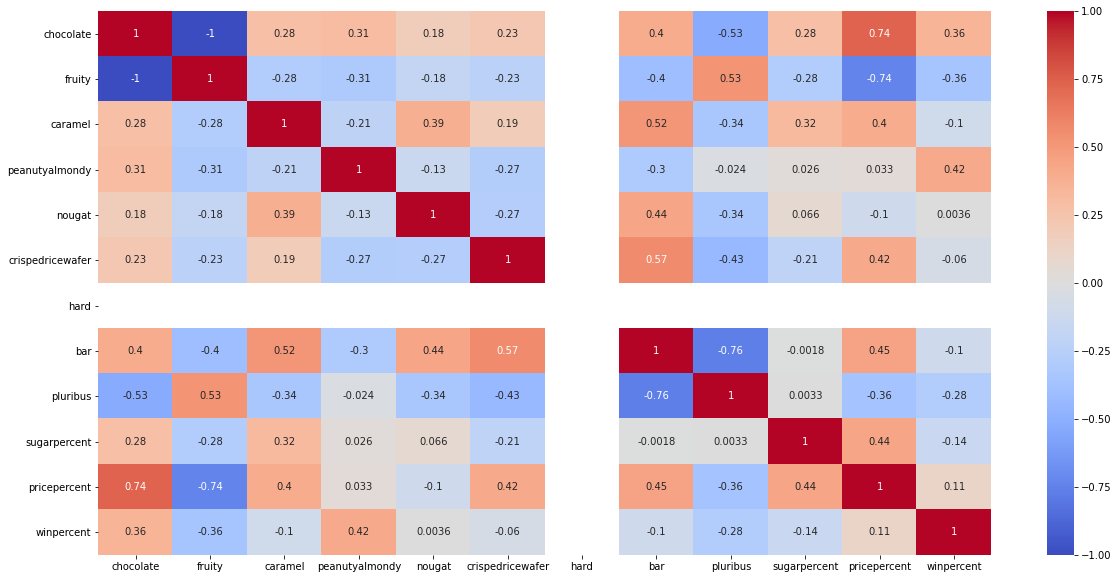

In [447]:
plt.figure(figsize=(20,10))
sns.heatmap(pick_high.corr(),annot= True, cmap = 'coolwarm')
plt.show()

In [453]:
def display_all(data):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(data)
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop = True)

correlation = display_all(corrank(pick_high))
correlation
 


,Feature1,Feature2,corr
0,chocolate,pricepercent,0.741385
1,crispedricewafer,bar,0.568796
2,fruity,pluribus,0.530330
3,caramel,bar,0.516459
4,bar,pricepercent,0.446833
5,nougat,bar,0.439298
6,sugarpercent,pricepercent,0.437699
7,peanutyalmondy,winpercent,0.421195
8,crispedricewafer,pricepercent,0.418635
9,chocolate,bar,0.404520


These above correlation ranks cleary explain how much any 2 features in our candy dataset are positively or negatively correlated or not actually related. 
This also cleary shows that producing a hard candy is not suggestible as it has almost no correlation or combination with any flavour as itself is not preferred in our highly winning competitors data whereas chocolate has good correlation with price percent which tells that, obviously being chocolate accounts to most of the obtained price percent. Then crispedricewafers being bars are of high correlation as wafers generally exsist in the form of bars.

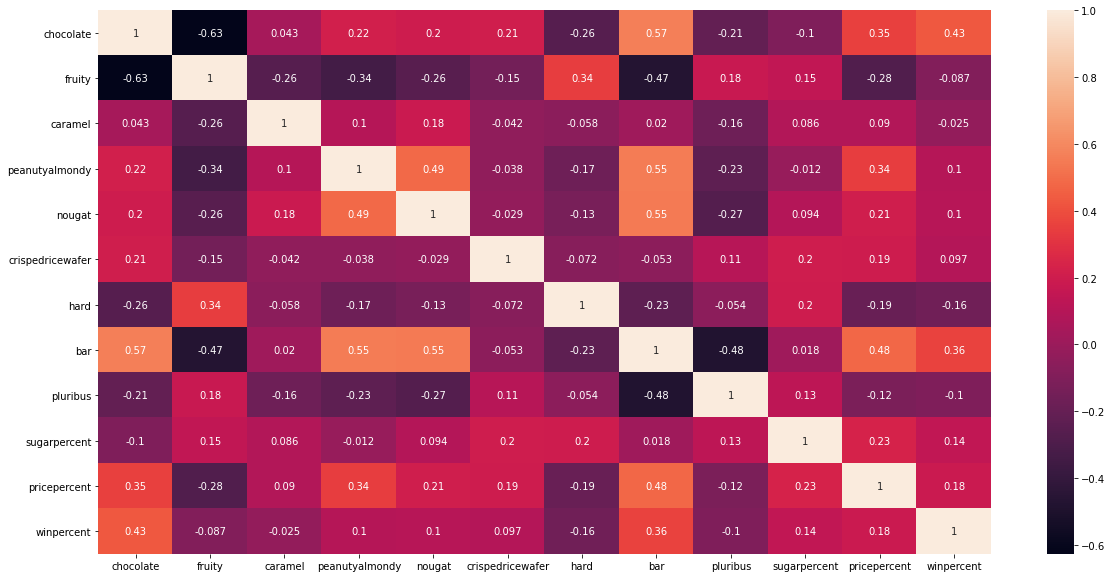

In [399]:
plt.figure(figsize=(20,10))
sns.heatmap(pick_low.corr(),annot=True)
plt.show()

In [400]:
def corrank(X):
    import itertools
    df = pd.DataFrame([[i,j,X.corr().loc[i,j]] for i,j in list(itertools.combinations(X.corr(), 2))],columns=['Feature1','Feature2','corr'])    
    return df.sort_values(by='corr',ascending=False).reset_index(drop=True)

correlation = display_all(corrank(pick_low))
correlation

,Feature1,Feature2,corr
0,chocolate,bar,0.567812
1,peanutyalmondy,bar,0.550572
2,nougat,bar,0.547207
3,peanutyalmondy,nougat,0.485308
4,bar,pricepercent,0.483551
5,chocolate,winpercent,0.431951
6,bar,winpercent,0.360278
7,chocolate,pricepercent,0.352799
8,peanutyalmondy,pricepercent,0.344324
9,fruity,hard,0.344267


This is the list of correlation values of low performing competitors, that tells what combinations in candy are not to be preferred if we are aiming for success of our brand. But the top ranks in this correlation can be used in some cases.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



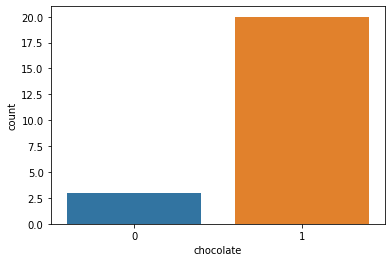

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



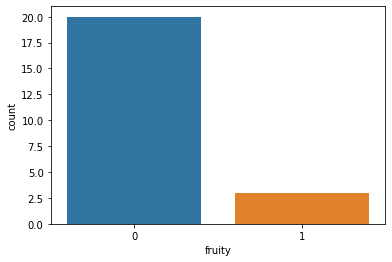

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



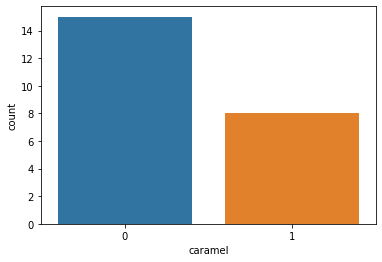

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



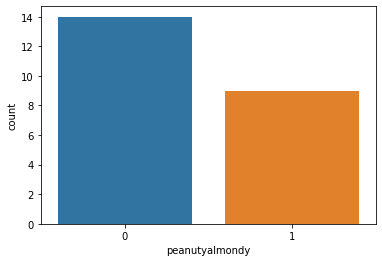

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



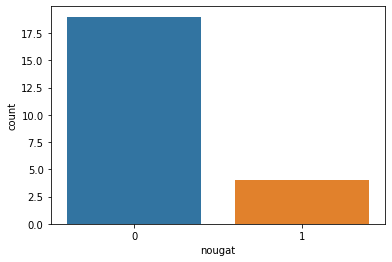

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



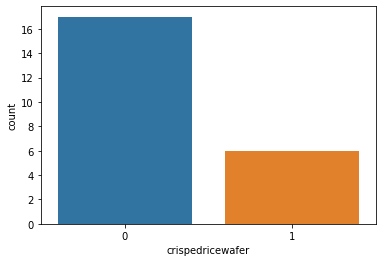

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



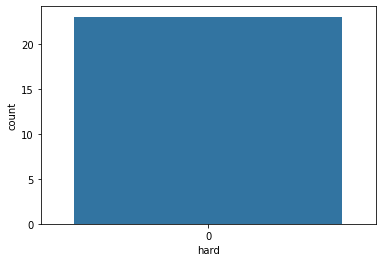

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



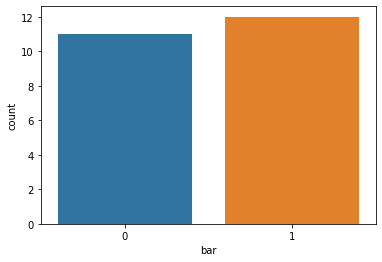

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



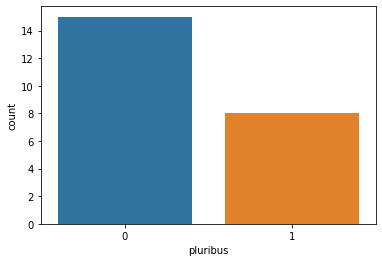

In [401]:
sns.countplot('chocolate',data = pick_high)
plt.show()
sns.countplot('fruity', data = pick_high) 
plt.show()
sns.countplot('caramel',data = pick_high)
plt.show()  
sns.countplot('peanutyalmondy', data = pick_high)
plt.show()
sns.countplot('nougat', data= pick_high)
plt.show()
sns.countplot('crispedricewafer', data = pick_high)
plt.show()
sns.countplot('hard', data = pick_high)
plt.show()
sns.countplot('bar',data = pick_high)
plt.show()
sns.countplot('pluribus',data = pick_high)
plt.show()


Each count plot represents count of presence of flavour in candies on the whole in high performing brands. y-axis indicates the count of candies with the presence or absence i.e., 1 or 0 respectively, of a particular flavour ( on x-axis) of the high win percent competitors. It can be inferred that not many competitors produce candys with fruity,crispedricewafer,nougat flavours and hard candies but chocolate flavour and choclate-bar type candys are produced largely.

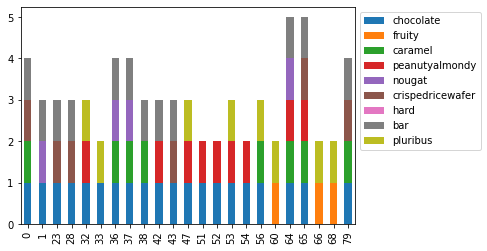

In [402]:
combos.plot.bar(stacked = True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


The maximum number of combination flavours of a candy is 5 and the minimum is 2, among those with high win percentage.
This plot is a quick view of candies with their combinations.
This plot also shows that chocolate flavour is present in almost all of them as choclate is basically a key ingredient in a chocolate or candy.

***Observing variations and combinations in sugar, price and win percents among our top 23 brands with high win percentage***.

In [403]:
types_percent =  pick_high[pick_high.columns[9:]]
types_percent

,sugarpercent,pricepercent,winpercent
0,0.73,0.86,0.67
1,0.60,0.51,0.68
23,0.43,0.92,0.62
28,0.31,0.51,0.77
32,0.82,0.65,0.71
33,0.82,0.65,0.67
36,0.60,0.65,0.73
37,0.73,0.44,0.61
38,0.96,0.86,0.64
42,0.60,0.77,0.71


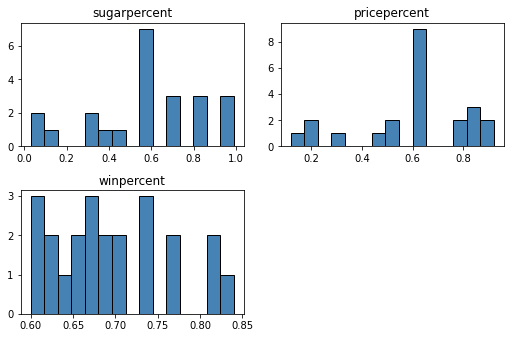

In [404]:
types_percent.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)    
plt.tight_layout(rect=(0, 0, 1.2, 1.2))  
# graphical representation of frequency of percent values on y axis and different percent values present on x axis

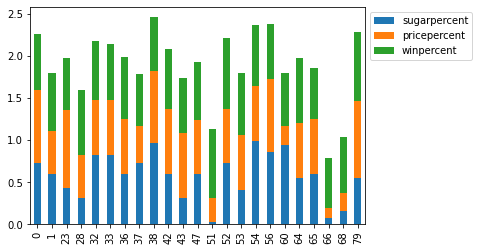

In [405]:
types_percent.plot.bar(stacked = True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1)) 


Tells us about the proportions of percentage values in each individual competitor of the list of high winpercent competitors. We can observe that in most of the cases those with more win percent also have more price percent. But almost all with more win percent have more sugars in them as well.

***Univariate Analysis***

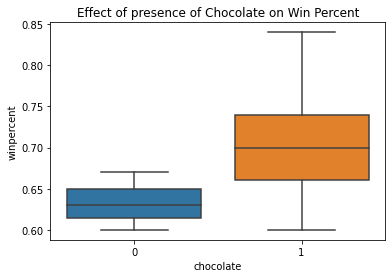

1    20
0     3
Name: chocolate, dtype: int64


In [406]:
sns.boxplot(x="chocolate", y="winpercent", data=pick_high).set_title('Effect of presence of Chocolate on Win Percent')
plt.show()
brand_choc = pick_high.chocolate.value_counts()
brand_choc[brand_choc>1]    
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. 
print(brand_choc)

This shows that more than 50% quartile of candies have Chocolate and it contributues to upto 70% of win percent when compared to without chocolate.

---Quartiles tell us about the spread of a data set by breaking the data set into quarters, just like the median breaks it in half. ... 

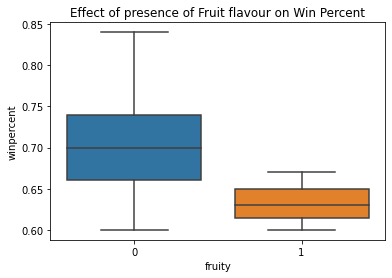

0    20
1     3
Name: fruity, dtype: int64


In [407]:
sns.boxplot(x="fruity", y="winpercent", data=pick_high).set_title('Effect of presence of Fruit flavour on Win Percent')
plt.show()
brand_choc = pick_high.fruity.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This shows that upto 50% quartile of candies not containing fruit flavour contributues to upto 70% of win percent when compared to containing fruit flavour.

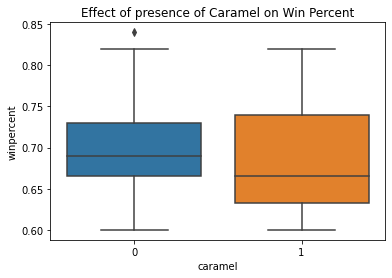

0    15
1     8
Name: caramel, dtype: int64


In [408]:
sns.boxplot(x="caramel", y="winpercent", data=pick_high).set_title('Effect of presence of Caramel on Win Percent')
plt.show()
brand_choc = pick_high.caramel.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This shows that nearly upto 50% quartile of candies 'not' having caramel contributues to nearly 70% of win percent when compared to having caramel.

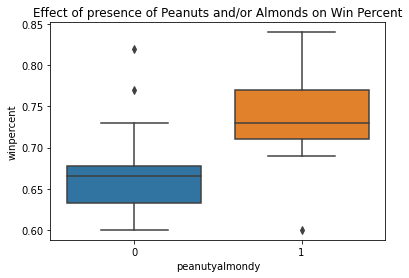

0    14
1     9
Name: peanutyalmondy, dtype: int64


In [409]:
sns.boxplot(x="peanutyalmondy", y="winpercent", data=pick_high).set_title('Effect of presence of Peanuts and/or Almonds on Win Percent')
plt.show()
brand_choc = pick_high.peanutyalmondy.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This shows that upto 50% quartile of the candies not having peanuts and/or almonds contributes to nearly 70% of win percent.

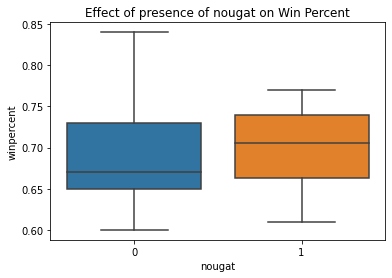

0    19
1     4
Name: nougat, dtype: int64


In [410]:
sns.boxplot(x="nougat", y="winpercent", data=pick_high).set_title('Effect of presence of nougat on Win Percent')
plt.show() # also with reference to value counts in nougat

brand_choc = pick_high.nougat.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)



This shows that more percent quartile of candies having no nougat contributes to a higher winning percent than having nougat



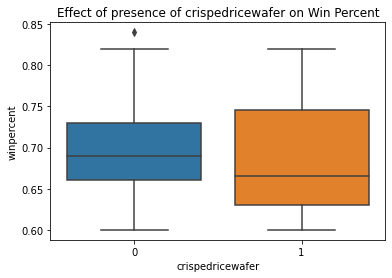

0    17
1     6
Name: crispedricewafer, dtype: int64


In [411]:
sns.boxplot(x="crispedricewafer", y="winpercent", data=pick_high).set_title('Effect of presence of crispedricewafer on Win Percent')
plt.show()
brand_choc = pick_high.crispedricewafer.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)


This shows that upto 50% quartile of candies not having crispedricewafer contributes to a higher win percent of nearly 70% when compared to having crispedricewafer

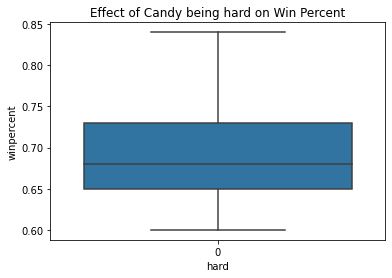

0    23
Name: hard, dtype: int64


In [412]:
sns.boxplot(x="hard", y="winpercent", data=pick_high).set_title('Effect of Candy being hard on Win Percent')
plt.show()
brand_choc = pick_high.hard.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This cleary shows that to get a good win percent its not suggestible to produce hard type of candies as they are not much preferred.

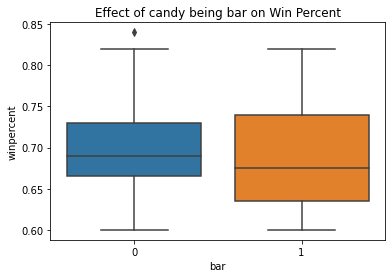

1    12
0    11
Name: bar, dtype: int64


In [413]:
sns.boxplot(x="bar", y="winpercent", data=pick_high).set_title('Effect of candy being bar on Win Percent')
plt.show()
brand_choc = pick_high.bar.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This shows that upto 50% quartile of candies being 'not' bar contributes to a slightly higher win percent than being bar i.e., upto nearly 70%. So, bar type candy production can not be overlooked as it can be preffered as much as it may not be

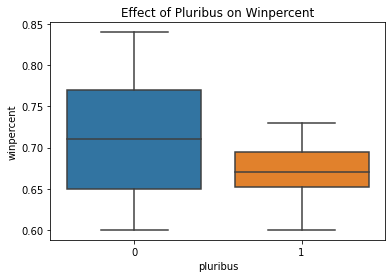

0    15
1     8
Name: pluribus, dtype: int64


In [414]:
sns.boxplot(x="pluribus", y="winpercent", data=pick_high).set_title('Effect of Pluribus on Winpercent')
plt.show()
brand_choc = pick_high.pluribus.value_counts()
brand_choc[brand_choc>1]
print(brand_choc)

This shows that upto 50% quartile of not pluribus type production contributes to more than 70% of win percent when compared to being pluribus.

In all the above box plots, 50% quartile of candies with presence of certain flavour is generally preffered in order to have a common criteria for comparision and better understanding of influence of a flavour presence/absence on win percent.

***Bivariate Analysis***

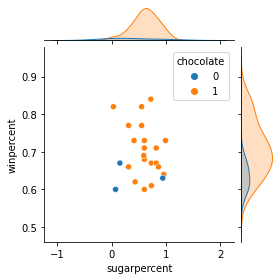

In [415]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'chocolate',kind = 'scatter', height = 4, data = pick_high)
plt.show()


chocolate in candy with sugar percent to more than 50% leads to mostly around 70 % of winpercent

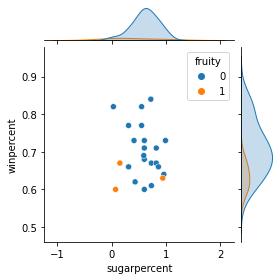

In [416]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'fruity',kind = 'scatter', height = 4, data = pick_high)
plt.show()


No fruit flavour in candy with sugar percent to more than 50% leads to mostly around 70 % of winpercent



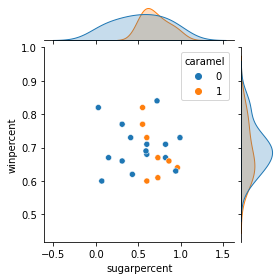

In [417]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'caramel',kind = 'scatter', height = 4, data = pick_high)
plt.show()

Mostly, no caramel in candy with sugar percent to more than 50% leads to mostly around 70 % of winpercent

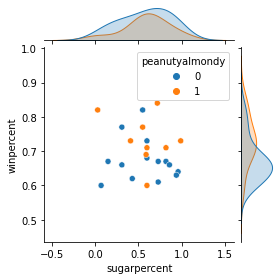

In [418]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'peanutyalmondy',kind = 'scatter', height = 4, data = pick_high) 
plt.show()

No peanuts and/ or almonds in candy with sugar percent to more than 50% leads to less than 70 % of winpercent

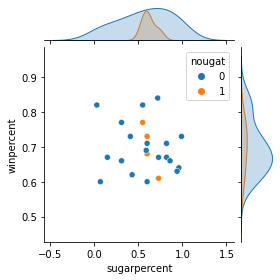

In [419]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'nougat',kind = 'scatter', height = 4, data = pick_high) 
plt.show()

Mostly on the whole, absence of nougat in candy with sugar percent to more than 50% leads to mostly around 70 % of winpercent when compared having nougat

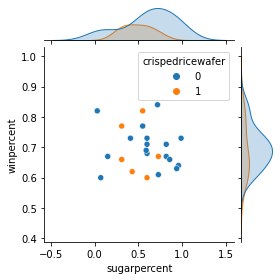

In [420]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'crispedricewafer',kind = 'scatter', height = 4, data = pick_high)
plt.show()

Not being crispedricewafer type of candy with sugar percent to more than 50% leads to mostly around 70 % of winpercent

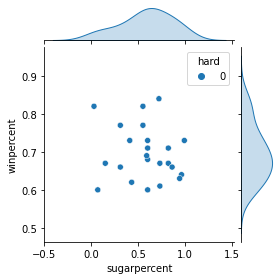

In [421]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'hard',kind = 'scatter', height = 4, data = pick_high) 
plt.show()

Clearly, not being hard leads to around 70% and more win percent.

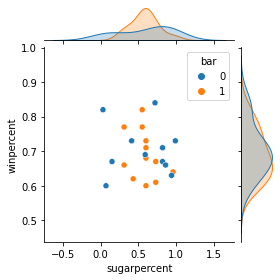

In [422]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'bar',kind = 'scatter', height = 4, data = pick_high) 
plt.show()

Being bar candy with sugar percent to more than 50% leads to mostly in between 60 to 70% of winpercent

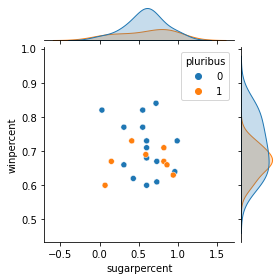

In [423]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',hue = 'pluribus',kind = 'scatter', height = 4, data = pick_high) 
plt.show()

Being a pluribus with sugar percent to more than 50% leads to sharply around 70 % of winpercent

Text(0.5, 0, 'pricepercent')

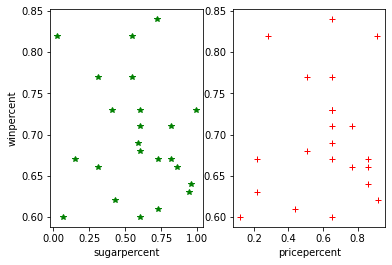

In [424]:
x= pick_high.sugarpercent
y= pick_high.winpercent
x_p = pick_high.pricepercent

plt.subplot(1,2,1)
plt.plot(x,y,'g*', data = pick_high)
plt.xlabel('sugarpercent')
plt.ylabel('winpercent')
plt.subplot(1,2,2)
plt.plot(x_p,y,'r+', data = pick_high)
plt.xlabel('pricepercent')



Kind of a cluster of points in both plots say that with sugar percent more than 60% upto 80% and price percent around 60 to 70% contributes to approximately 68 to 74% of win percent.

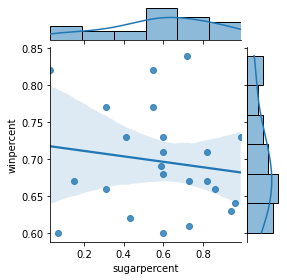

In [425]:
sns.jointplot( x= 'sugarpercent', y= 'winpercent',kind = 'reg', height = 4, data = pick_high)


This plot tells us that main chance of achieving win percent to upto 65 to 70% is when sugarpercent is around 60%

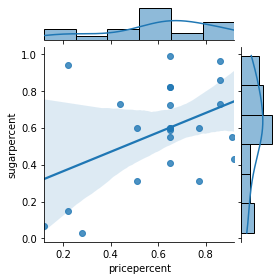

In [426]:
sns.jointplot( x= 'pricepercent', y= 'sugarpercent',kind = 'reg', height = 4, data = pick_high)
plt.show()

Price percent of around 50-60% has sugar percent of around 55-65%

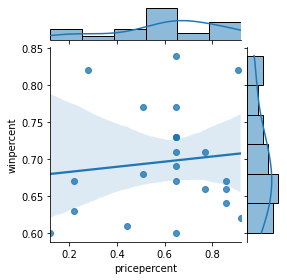

In [427]:
sns.jointplot( x= 'pricepercent', y= 'winpercent',kind = 'reg', height = 4, data = pick_high)
plt.show()

This plot tells us that main chance of achieving win percent to upto 65 to 73% is when pricepercent is around 60 to 65%

In [454]:
import plotly.express as px   #used for highly interactice plots and rapid plotting and figure making
#import plotly.io as pio  #supporting low level interface for displaying reading and writing figures
 
fig = px.scatter_3d(data_frame = pick_high, x = 'pricepercent', y = 'winpercent',z = 'sugarpercent',color_discrete_sequence= ['magenta','green'], template = 'ggplot2',height = 700)
pio.show(fig)


This animated 3d scatter plot shows at every point for what percent of price and sugar percent what is the win percent obtained.

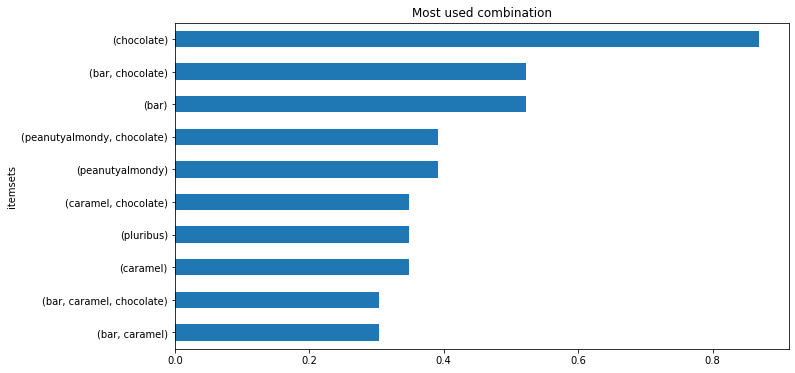

In [455]:
from mlxtend.frequent_patterns import apriori  #used for Association Rules Generation(internally) from Frequent Itemsets
combos =  pick_high[pick_high.columns[:-3]]
combination = apriori(combos, min_support=0.3,use_colnames=True).sort_values(by='support')


combination.plot(kind='barh',x='itemsets',y='support',title=f'Most used combination',sort_columns=True,figsize = (11,6),legend=False)

The above graph gives a representation of most frequently used combinations. This shows that chocolate is the most frequently used ingredient and it also contributes a major role in combinations. That means many leading competitors with high win percent prefer to have chocolate as the main ingredient in candies also in combination with other flavours.

In [430]:
all_types_percent = candy[candy.columns[9:]]
all_types_percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sugarpercent  85 non-null     float64
 1   pricepercent  85 non-null     float64
 2   winpercent    85 non-null     float64
dtypes: float64(3)
memory usage: 2.1 KB


In [431]:
all_types = candy[candy.columns[:-3]]
all_types_percent = candy[candy.columns[9:]]

from sklearn.preprocessing import StandardScaler
for col in all_types_percent:
  ss = StandardScaler()
  std = ss.fit_transform(all_types_percent.values)
  
std_df = pd.DataFrame(std,index = all_types_percent.index , columns = all_types_percent.columns)
std_df

,sugarpercent,pricepercent,winpercent
0,0.900102,1.375198,1.141323
1,0.436845,0.145497,1.209498
2,-1.665629,-1.224740,-1.244788
3,-1.665629,0.145497,-0.290344
4,1.541535,0.145497,0.118704
...,...,...,...
80,-0.917291,-1.224740,-0.358518
81,-1.380548,-1.224740,-0.767566
82,-0.596574,-0.557189,-0.426693
83,-1.024196,-0.697726,-0.563042


In [432]:
d_f = pd.concat([all_types, std_df], axis = 1)
display_all(d_f)

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.900102,1.375198,1.141323
1,1,0,0,0,1,0,0,1,0,0.436845,0.145497,1.209498
2,0,0,0,0,0,0,0,0,0,-1.665629,-1.224740,-1.244788
3,0,0,0,0,0,0,0,0,0,-1.665629,0.145497,-0.290344
4,0,1,0,0,0,0,0,0,0,1.541535,0.145497,0.118704
5,1,0,0,1,0,0,0,1,0,-0.062047,1.058989,-0.017645
6,1,0,1,1,1,0,0,1,0,0.436845,1.058989,0.459577
7,0,0,0,1,0,0,0,0,1,-0.596574,0.145497,-1.858360
8,0,0,0,0,0,0,0,0,1,1.541535,-0.522054,-0.835741
9,0,1,1,0,0,0,0,0,0,0.436845,-0.522054,-1.040264


***Features selection using Decision Tree Model and Lasso Model***

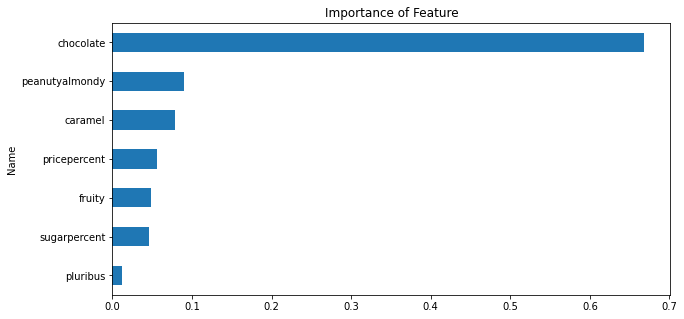

In [458]:
from sklearn import tree
dtree = tree.DecisionTreeRegressor(max_depth=3).fit(d_f[d_f.columns[0:-1]],d_f[d_f.columns[11:]])
imp = pd.DataFrame.from_dict({'Name':d_f.columns[0:-1],'Importance':dtree.feature_importances_})
imp_plot = imp.sort_values(by='Importance',ascending=True).reset_index(drop=True)
imp_plot[imp_plot.Importance>0].plot(kind='barh',x='Name',y='Importance',title= 'Importance of Feature',sort_columns=True,figsize = (10,5),legend=False)

This graph clearly shows the types that are not actually important with their absence in the plot like hard,crispedricewafer, nougat. It also shows candies with chocolate are of high importance.

In [434]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
pd.pandas.set_option('display.max_columns',None)

In [435]:
X_train = d_f[d_f.columns[0:-1]]
y_train = d_f[d_f.columns[-1]]
feature_select_model = SelectFromModel(Lasso(alpha = 0.005, random_state=0)) \the bigger the alpha value the lesser features are selected
feature_select_model.fit(X_train,y_train)  
#selectfrommodel selects the features who have smaller slopes close to or almost 0 as it follows lasso intution

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=0,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [436]:
feature_select_model.get_support() #gives true and false which says which features have to be taken and which not respectively.
selected_feat = X_train.columns[(feature_select_model.get_support())]
print('total features : {}'.format((X_train.shape[1])))
print('selected_features : {}'.format(len(selected_feat)))
selected_feat

total features : 11
selected_features : 10


Index(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'crispedricewafer',
       'hard', 'bar', 'pluribus', 'sugarpercent', 'pricepercent'],
      dtype='object')

Hence the feature that is not really important with respect to Lasso and SelectFromModel Model from sklearn library is "Nougat"

***If we want to know the names of competitors and plot them in order of their win percent , it can be done as follows***

In [437]:
Brands = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")
Brands.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


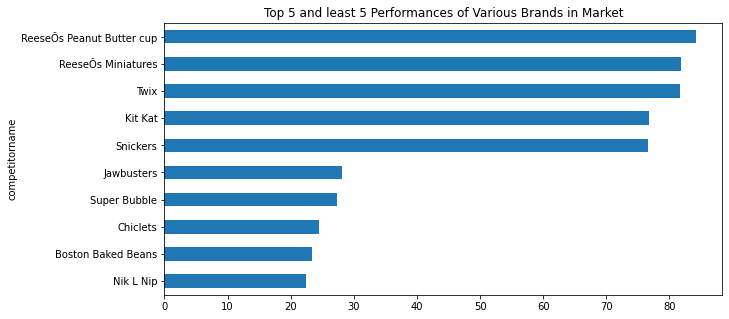

In [438]:
Performance = Brands[['competitorname','winpercent']].sort_values(by='winpercent')
pd.concat([Performance.head(5),Performance.tail(5)],axis=0).plot(x='competitorname',y='winpercent',kind='barh',title='Top 5 and least 5 Performances of Various Brands in Market',sort_columns=True,figsize = (10,5),legend=False)

***Splitting the Data into training and testing to find the best fit model to predict win percent***

In [460]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(d_f[d_f.columns[0:-1]],d_f[d_f.columns[11:]], test_size=0.25, random_state=42)
rmse_err = []

In [462]:
import math
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,dec_tree.predict(X_test))))
rmse_err[-1]

0.8621213434053135

In [441]:
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rand_for.predict(X_test))))
rmse_err[-1]

0.7790573893349445

In [442]:
from sklearn.linear_model import LinearRegression
lr_reg = LinearRegression().fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,lr_reg.predict(X_test))))
rmse_err[-1]

0.7871427463199225

In [443]:
from sklearn.linear_model import Ridge
rid_reg = Ridge(alpha = .5).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,rid_reg.predict(X_test))))
rmse_err[-1]

0.7910169689424857

In [444]:
from sklearn.linear_model import Lasso
las_reg = Lasso(alpha = 0.1).fit(X_train,y_train)
rmse_err.append(math.sqrt(mean_squared_error(y_test,las_reg.predict(X_test))))
rmse_err[-1]

0.7820801889052178

In [445]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_ = poly.fit_transform(X_train)
X_test_ = poly.fit_transform(X_test)

pol_reg = LinearRegression().fit(X_, y_train)

rmse_err.append(math.sqrt(mean_squared_error(y_test,pol_reg.predict(X_test_))))
rmse_err[-1]

4.275658305074856

The model with root mean square error value close to 0 is supposed to be the best fit model with high accuracy. Here the rank of best fit models is as follows



1.   Random Forest Regressor model
2.   Lasso Regressor model
3.   Linear Regression model
4.   Ridge Regression model
5.   Decision tree Regressor model 
6.   Polynomial Regression model.





From the entire case study we can arrive at a conclusion that it was obviously because of the flavours in the candies huge sucess rates were met but not the sugars or cost. Sugar percent or Cost of candies did not stop or reduce customers to make purchase, creating almost no impact on success of brand. It was the favoutire flavours like chocolate , bar type chocolates, with peanuts and almonds that lead to high success rate and not so favourite flavours were nougat, crisped ricewafer and hard candies